<a href="https://colab.research.google.com/github/onepixelm/Hazi-02/blob/master/gyakandweather.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# http://bit.ly/dl-gyak


In [0]:
!pip install unidecode

    100% |████████████████████████████████| 235kB 7.1MB/s 


In [0]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, LSTM
from urllib.request import urlretrieve
import unidecode
import numpy as np
import random
import sys
import re, cgi

In [0]:
url_book = "http://mek.oszk.hu/00500/00500/00500.htm"
urlretrieve(url_book, "book.html")
text = open('book.html', encoding='latin-1').read().lower()

In [0]:
!ls

book.html  sample_data


In [0]:
len(text)

60911

In [0]:
tag_re = re.compile(r'(<!--.*?-->|<[^>]*.>)')
no_tags = tag_re.sub('',text)
text = cgi.escape(no_tags)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: cgi.escape is deprecated, use html.escape instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
def cleanStrings(inStr):
  a = inStr.find('<')
  b = inStr.find('>')
  if a < 0 and b < 0:
    return inStr
  return cleanString(inStr[a:b-a])

text = cleanStrings(text)

In [0]:
print("Szoveg hossza:", len(text))

Szoveg hossza: 51825


In [0]:
js_text='var gemius_identifier = "nA5K38S_R6j5UvHZZUaBxcUFjzOBaptU.eLGPQLqtjX.r7"; function gemius_pending(i) { window[i] = window[i] || function() {var x = window[i+"_pdata"] = window[i+"_pdata"] || []; x[x.length]=arguments;};};gemius_pending("gemius_hit"); gemius_pending("gemius_event"); gemius_pending("pp_gemius_hit"); gemius_pending("pp_gemius_event");(function(d,t) {try {var gt=d.createElement(t),s=d.getElementsByTagName(t)[0],l="http"+((location.protocol=="https:")?"s":""); gt.setAttribute("async","async");gt.setAttribute("defer","defer"); gt.src=l+"://gthu.hit.gemius.pl/gemius.js"; s.parentNode.insertBefore(gt,s);} catch (e) {}})(document,"script");'
    

In [0]:
text=text[:-661]

In [0]:
chars = sorted(list(set(text)))
print("Elofordulo karakterek szama:", len(chars))

Elofordulo karakterek szama: 48


In [0]:
chars

['\n',
 ' ',
 '!',
 '"',
 '&',
 '(',
 ')',
 ',',
 '-',
 '.',
 '2',
 '4',
 ':',
 ';',
 '?',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'y',
 'z',
 'á',
 'é',
 'í',
 'ó',
 'õ',
 'ö',
 'ú',
 'û',
 'ü']

In [0]:
char_indices = dict((c,i) for i,c in enumerate(chars))

In [0]:
print(char_indices)

{'\n': 0, ' ': 1, '!': 2, '"': 3, '&': 4, '(': 5, ')': 6, ',': 7, '-': 8, '.': 9, '2': 10, '4': 11, ':': 12, ';': 13, '?': 14, 'a': 15, 'b': 16, 'c': 17, 'd': 18, 'e': 19, 'f': 20, 'g': 21, 'h': 22, 'i': 23, 'j': 24, 'k': 25, 'l': 26, 'm': 27, 'n': 28, 'o': 29, 'p': 30, 'r': 31, 's': 32, 't': 33, 'u': 34, 'v': 35, 'w': 36, 'y': 37, 'z': 38, 'á': 39, 'é': 40, 'í': 41, 'ó': 42, 'õ': 43, 'ö': 44, 'ú': 45, 'û': 46, 'ü': 47}


In [0]:
indices_char = dict((i,c) for i,c in enumerate(chars))
print(indices_char)

{0: '\n', 1: ' ', 2: '!', 3: '"', 4: '&', 5: '(', 6: ')', 7: ',', 8: '-', 9: '.', 10: '2', 11: '4', 12: ':', 13: ';', 14: '?', 15: 'a', 16: 'b', 17: 'c', 18: 'd', 19: 'e', 20: 'f', 21: 'g', 22: 'h', 23: 'i', 24: 'j', 25: 'k', 26: 'l', 27: 'm', 28: 'n', 29: 'o', 30: 'p', 31: 'r', 32: 's', 33: 't', 34: 'u', 35: 'v', 36: 'w', 37: 'y', 38: 'z', 39: 'á', 40: 'é', 41: 'í', 42: 'ó', 43: 'õ', 44: 'ö', 45: 'ú', 46: 'û', 47: 'ü'}


Szöveg numerikussá alakítása és ablakokra való vágása:

In [0]:
maxlen = 40
step = 3

sentences = []
next_chars = []

for i in range(0, len(text)-maxlen, step):
  sentences.append(text[i:i+maxlen])
  next_chars.append(text[i+maxlen])
 

In [0]:
sentences

['\n\n\n\n\n        \n        szophoklész: antig',
 '\n\n        \n        szophoklész: antigoné',
 '       \n        szophoklész: antigoné\n\n\n',
 '    \n        szophoklész: antigoné\n\n\n\n\n ',
 ' \n        szophoklész: antigoné\n\n\n\n\n  \n ',
 '       szophoklész: antigoné\n\n\n\n\n  \n    ',
 '    szophoklész: antigoné\n\n\n\n\n  \n    szo',
 ' szophoklész: antigoné\n\n\n\n\n  \n    szopho',
 'ophoklész: antigoné\n\n\n\n\n  \n    szophoklé',
 'oklész: antigoné\n\n\n\n\n  \n    szophoklész\n',
 'ész: antigoné\n\n\n\n\n  \n    szophoklész\n   ',
 ': antigoné\n\n\n\n\n  \n    szophoklész\n   ant',
 'ntigoné\n\n\n\n\n  \n    szophoklész\n   antigo',
 'goné\n\n\n\n\n  \n    szophoklész\n   antigoné\n',
 'é\n\n\n\n\n  \n    szophoklész\n   antigoné\nfor',
 '\n\n\n  \n    szophoklész\n   antigoné\nfordít',
 '  \n    szophoklész\n   antigoné\nfordított',
 '    szophoklész\n   antigoné\nfordította: ',
 ' szophoklész\n   antigoné\nfordította: tre',
 'ophoklész\n   antigoné\nfordította: 

In [0]:
print("Tanító adatbázis hossza:", len(sentences))

Tanító adatbázis hossza: 17042


In [0]:
print(next_chars)

['o', '\n', '\n', ' ', ' ', 's', 'p', 'k', 's', ' ', 'a', 'i', 'n', 'f', 'd', 'o', 'a', 't', 'n', 'é', 'i', 'a', 'a', 'e', 'i', 'e', '\n', '\n', '\n', 'a', ';', 'p', 'b', ';', 'z', 'é', 'e', ' ', ' ', 'n', 'g', 'é', ' ', 'z', 'n', ' ', ' ', 'é', 'i', 'é', 'k', 'a', '\n', 'k', 'ó', ' ', 'r', ' ', 'i', 'n', ' ', 'i', 's', 'á', '\n', 'h', 'n', '\n', 'e', 'ü', 'k', ' ', 'á', 'd', ' ', 'r', 'k', 'ö', 'é', 'k', 'h', 'a', 'a', ' ', 'k', 'á', 'i', 'a', 't', 'e', 't', 'b', 'u', 't', 'k', 'r', 'e', '4', '-', 'n', '&', 'p', 'm', 'n', 'p', '\n', 't', 'o', ' ', ' ', 'z', 'n', '\n', 'n', 'g', 'é', 'z', 'n', ' ', 's', 'é', ' ', 'y', 'z', ',', 'g', 'l', 'e', 'v', 'e', 'i', 'e', 'z', ' ', 'j', ' ', 't', 'i', 'p', 'z', 't', 'n', 'u', 'n', 't', 'n', 'e', 'k', ' ', 'g', 'l', 'k', 'n', ' ', 'l', 'z', ' ', 'u', '?', 'r', 'n', 'c', 'n', 't', ' ', ' ', 'n', ' ', 'm', ' ', 'j', 'l', ',', 'n', ' ', 'c', 'e', 'n', 'g', 's', 'i', 's', ' ', 'g', 'ú', 'l', ',', 'i', 'n', 'l', 'n', 'k', 'a', 'u', ' ', 'l', 's', 'n',

In [0]:
X = np.zeros((len(sentences), maxlen, len(chars)))
Y = np.zeros((len(sentences), len(chars)))

for i, sentence in enumerate(sentences):
  for t, char in enumerate(sentence):
    X[i,t,char_indices[char]] = 1
  Y[i, char_indices[next_chars[i]]] = 1
  

In [0]:
print(X.shape)
print(Y.shape)

(17042, 40, 48)
(17042, 48)


In [0]:
model = Sequential()
model.add(LSTM(32, recurrent_dropout=0.3, input_shape=(X.shape[-2], X.shape[-1],)))
model.add(Dense(len(chars)))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam')

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 32)                10368     
_________________________________________________________________
dense_3 (Dense)              (None, 48)                1584      
_________________________________________________________________
activation_2 (Activation)    (None, 48)                0         
Total params: 11,952
Trainable params: 11,952
Non-trainable params: 0
_________________________________________________________________


In [0]:
def sample(preds, temperature=1.0):
  preds = np.asarray(preds).astype(np.float64)
  preds = np.log(preds) / temperature
  exp_preds = np.exp(preds)
  preds = exp_preds / np.sum(exp_preds)
  probas = np.random.multinomial(1,preds,1)
  return np.argmax(probas),preds

fake_preds = [0.1, 0.2, 0.3, 0.15, 0.25]
for temp in [0.1, 0.5, 1, 2, 4]:
  print("Temp:",temp)
  print(fake_preds)
  proba, preds = sample(fake_preds,temp)
  print(preds)
  print(proba)
  print("\n\n")

Temp: 0.1
[0.1, 0.2, 0.3, 0.15, 0.25]
[1.43537082e-05 1.46981972e-02 8.47572114e-01 8.27707142e-04
 1.36887628e-01]
4



Temp: 0.5
[0.1, 0.2, 0.3, 0.15, 0.25]
[0.04444444 0.17777778 0.4        0.1        0.27777778]
0



Temp: 1
[0.1, 0.2, 0.3, 0.15, 0.25]
[0.1  0.2  0.3  0.15 0.25]
4



Temp: 2
[0.1, 0.2, 0.3, 0.15, 0.25]
[0.14384043 0.20342109 0.24913894 0.17616783 0.2274317 ]
2



Temp: 4
[0.1, 0.2, 0.3, 0.15, 0.25]
[0.17037527 0.20261148 0.22422646 0.18855123 0.21423556]
4





In [0]:
start_index=random.randint(0,len(text)-maxlen-1)

for iteration in range(1,50):
  print("Iteracio szama:", iteration)
  model.fit(X,Y, batch_size=256, epochs=10)
  
  for temp in [0.1,0.5,1.0,1.2,2]:
    print("Temp:",temp)
    generated_text = ''
    sentence = text[start_index:start_index+maxlen]
    generated_text = sentence
    
    for i in range(200):
      x=np.zeros((1,maxlen,len(chars)))
      for t,char in enumerate(sentence):
        x[0,t,char_indices[char]]=1
        
      preds = model.predict(x, verbose=0)[0]
      
      next_index, _ = sample(preds, temp)
      next_char = indices_char[next_index]
      
      generated_text += next_char
      sentence = sentence[1:] + next_char
  
      sys.stdout.write(next_char)
      sys.stdout.flush()
      
    print("\n")
      
   
  

Iteracio szama: 1
Epoch 1/10
17042/17042 [==============================] - 7s 423us/step - loss: 3.1819
Epoch 2/10
17042/17042 [==============================] - 7s 429us/step - loss: 3.1661
Epoch 3/10
17042/17042 [==============================] - 7s 432us/step - loss: 3.1437
Epoch 4/10
17042/17042 [==============================] - 7s 428us/step - loss: 3.1159
Epoch 5/10
17042/17042 [==============================] - 7s 432us/step - loss: 3.0863
Epoch 6/10
17042/17042 [==============================] - 7s 430us/step - loss: 3.0544
Epoch 7/10
17042/17042 [==============================] - 7s 433us/step - loss: 3.0217
Epoch 8/10
17042/17042 [==============================] - 7s 432us/step - loss: 2.9884
Epoch 9/10
17042/17042 [==============================] - 7s 431us/step - loss: 2.9568
Epoch 10/10
17042/17042 [==============================] - 7s 431us/step - loss: 2.9261
Temp: 0.1
 a  a a en a a a et a a a met a s a et el a a a s a s a a  en a a a s a a a  en a a s et a a  e a s a

# 2018.10.25. - 1D CNN

In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

num_samples=1000
lp = np.linspace(-10*np.pi, 10*np.pi, num_samples)
x  = 30*(np.random.rand(num_samples)-0.5)+np.sin(lp)*3+np.cos(np.random.rand(num_samples)+lp*2)+np.cos(np.pi/2+lp*4)*15 + np.log(np.abs(lp))



In [0]:
print(x.shape)

(1000,)


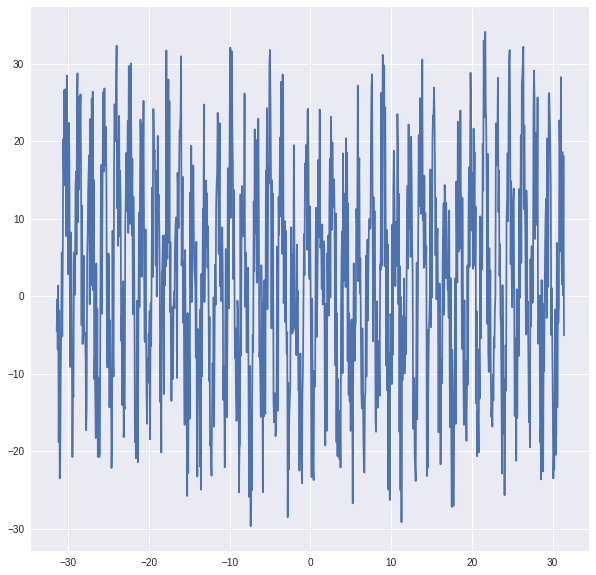

In [0]:
plt.figure(figsize=(10,10))
plt.plot(lp,x)

In [0]:
window_size=20

valid_split=0.3
test_split =0.2

from keras.models import Sequential
from keras.layers.core import Activation, Dense, Flatten
from keras.optimizers import SGD
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn import preprocessing
from keras.layers.convolutional import Convolution1D, MaxPooling1D
from keras.layers.convolutional import Conv1D

def make_1d_convnet(window_size, filter_length, nb_input_series=1, nb_output=1, nb_filter=4):
  model = Sequential()
  # Conv1D(filters=nb_filter, kernel_size=filter_length, activation='relu',...)
  model.add(Convolution1D(nb_filter=nb_filter, filter_length=filter_length, activation='relu', 
                           input_shape=(window_size, nb_input_series, )))
  model.add(MaxPooling1D()) # filter:2, stride:2
  model.add(Convolution1D(nb_filter=nb_filter, filter_length=filter_length, activation='relu'))
  model.add(MaxPooling1D()) # filter:2, stride:2
  model.add(Flatten())  
  model.add(Dense(1,activation='linear'))
  model.compile(loss='mse', optimizer='adam', metrics=['mae'])
  
  return model

#model=make_1d_convnet(window_size=window_size, filter_length=5)

In [0]:
def make_timeseries_innstance(timeseries, window_size):
  timeseries = np.asarray(timeseries)
  assert 0 < window_size < timeseries.shape[0], "Out of range"
  
  X = np.atleast_3d(np.array([timeseries[start:start+window_size] for start in range(0,timeseries.shape[0]-window_size)]))
  
  assert len(X.shape) == 3, "Dimension error"
  Y = timeseries[window_size:]
  
  return X, Y
  

In [0]:
def eval_timeseries(timeseries, window_length):
  filter_length = 5
  nb_filter = 4
  timeseries = np.atleast_2d(timeseries)
  if timeseries.shape[0]==1:
    timeseries = timeseries.T
  nb_samples, nb_series = timeseries.shape
  
  model=make_1d_convnet(window_size=window_size, 
                        filter_length=filter_length, 
                        nb_input_series=nb_series,
                        nb_filter=nb_filter)
  
  print(model.summary())
  X, Y = make_timeseries_innstance(timeseries, window_size)
  
  test_size = int(nb_samples*(1-test_split))
  valid_size = int(nb_samples*(1-valid_split-test_split))
  
  X_train, Y_train = X[:valid_size], Y[:valid_size]
  X_valid, Y_valid = X[valid_size:test_size], Y[valid_size:test_size]
  X_test, Y_test   = X[test_size:], Y[test_size:]
  
  ##$$$$$ NE FELEJTSETEK EL A STANDARADIZALAST $$$$$$
  ##$$$$$$ NE FELEJTESTEK EL EARLY STOPPINGOT ES MCP-t $$$$
  
  model.fit(X_train, Y_train, epochs=50, validation_data=[X_valid,Y_valid], verbose=2)
  
  ##$$$$$ NE FELETSETEK EL AZ MCP-t VISSZATOLTENI $$$$
  
  preds = model.predict(X_test)
  
  plt.figure(figsize=(10,10))
  plt.plot(preds, color='r')
  plt.plot(Y_test, color='b')
  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", input_shape=(20, 1), filters=4, kernel_size=5)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=4, kernel_size=5)`


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_3 (Conv1D)            (None, 16, 4)             24        
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 8, 4)              0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 4, 4)              84        
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 2, 4)              0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 8)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 117
Trainable params: 117
Non-trainable params: 0
_________________________________________________________________
None
Train o

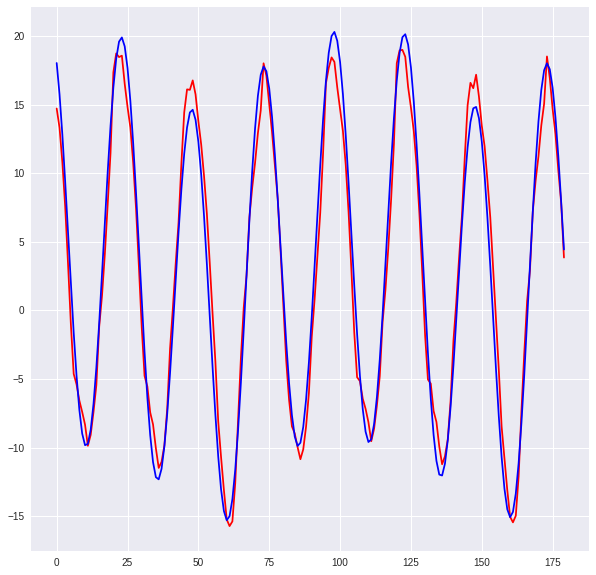

In [0]:
eval_timeseries(x, window_size)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", input_shape=(20, 1), filters=4, kernel_size=5)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=4, kernel_size=5)`


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_5 (Conv1D)            (None, 16, 4)             24        
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 8, 4)              0         
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 4, 4)              84        
_________________________________________________________________
max_pooling1d_6 (MaxPooling1 (None, 2, 4)              0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 8)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 117
Trainable params: 117
Non-trainable params: 0
_________________________________________________________________
None
Train o

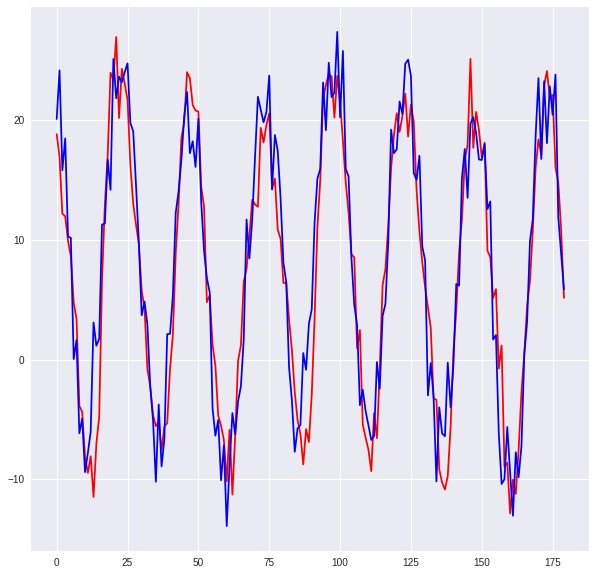

In [0]:
eval_timeseries(x, window_size)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", input_shape=(20, 1), filters=4, kernel_size=5)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=4, kernel_size=5)`


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_7 (Conv1D)            (None, 16, 4)             24        
_________________________________________________________________
max_pooling1d_7 (MaxPooling1 (None, 8, 4)              0         
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 4, 4)              84        
_________________________________________________________________
max_pooling1d_8 (MaxPooling1 (None, 2, 4)              0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 8)                 0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 9         
Total params: 117
Trainable params: 117
Non-trainable params: 0
_________________________________________________________________
None
Train o

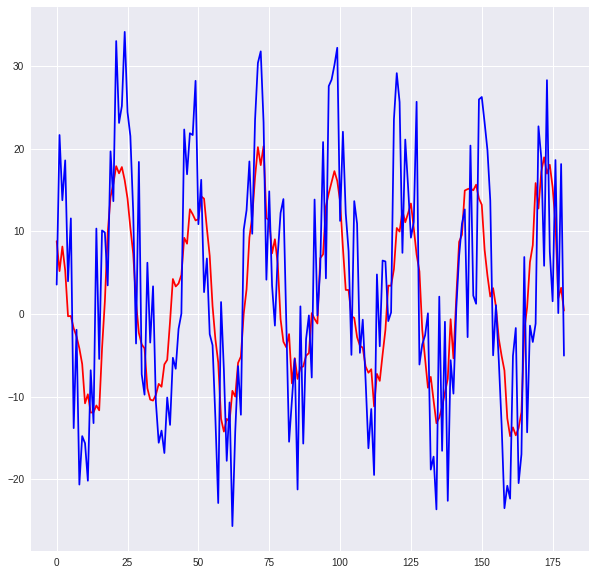

In [0]:
eval_timeseries(x, window_size)

# 2018.10.18.


In [0]:
from keras.datasets import mnist
from keras.utils import np_utils

(x_train, y_train), (x_test, y_test) = mnist.load_data()

Using TensorFlow backend.


In [0]:
x_train = x_train.reshape(-1,28*28)
x_test = x_test.reshape(-1,28*28)

In [0]:
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")

In [0]:
x_train = x_train / 255
x_test = x_test / 255

In [0]:
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)



In [0]:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)
batch_size=128


In [0]:
'''
import tensorflow as tf
sess = tf.Session()
# bemenet és kimenet definiálása
x = tf.placeholder(tf.float32, shape=[None, x_train.shape[-1]])
y_ = tf.placeholder(tf.float32, shape=[None, y_train.shape[-1]])
# a súlymátrixa és bias vektor definiálása
W = tf.Variable(tf.zeros([x_train.shape[-1],10]))
b = tf.Variable(tf.zeros([y_train.shape[-1]]))
# inicializálás
sess.run(tf.global_variables_initializer())
# a regresszió létrehozása
y = tf.nn.softmax(tf.matmul(x,W) + b)
# a költségfüggvény megadása
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))
# optimációs algoritmus megadása 
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)
# tanítás 1000 epoch, batch_size batch méret
batch_counter=0
for i in range(1000):
    train_step.run(session=sess, feed_dict={x: x_train[batch_counter*batch_size:(batch_counter+1)*batch_size], y_: y_train[batch_counter*batch_size:(batch_counter+1)*batch_size]})
    batch_counter=batch_counter+1
    if (batch_counter*batch_size > len(x_train)):
        batch_counter=0
'''

'\nimport tensorflow as tf\nsess = tf.Session()\n# bemenet és kimenet definiálása\nx = tf.placeholder(tf.float32, shape=[None, x_train.shape[-1]])\ny_ = tf.placeholder(tf.float32, shape=[None, y_train.shape[-1]])\n# a súlymátrixa és bias vektor definiálása\nW = tf.Variable(tf.zeros([x_train.shape[-1],10]))\nb = tf.Variable(tf.zeros([y_train.shape[-1]]))\n# inicializálás\nsess.run(tf.global_variables_initializer())\n# a regresszió létrehozása\ny = tf.nn.softmax(tf.matmul(x,W) + b)\n# a költségfüggvény megadása\ncross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))\n# optimációs algoritmus megadása \ntrain_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)\n# tanítás 1000 epoch, batch_size batch méret\nbatch_counter=0\nfor i in range(1000):\n    train_step.run(session=sess, feed_dict={x: x_train[batch_counter*batch_size:(batch_counter+1)*batch_size], y_: y_train[batch_counter*batch_size:(batch_counter+1)*batch_size]})\n    batch_counter=

In [0]:
'''
# ez megadja, hogy hányszor találtuk el 
# (az argmax megadja a legnagyobb értékhez tartozó indexet a második paraméter dimenziójában)
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
# ez pedig kitszámolja ezek átlagát
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
# most pedig lefuttatjuk a teszt képekre
print(accuracy.eval(session=sess, feed_dict={x: x_test, y_: y_test}))
'''

0.9139


# convnet


In [0]:
import tensorflow as tf 

sess = tf.Session()

def weight_variable(shape):
  initial = tf.truncated_normal(shape, stddev = 0.1, mean=0.2, name='weights')
  return tf.Variable(initial)

def bias_variable(shape):
  initial = tf.constant(0.2, shape=shape)
  return tf.Variable(initial)

def conv2d(x, W, name):
  return tf.nn.conv2d(x, W, strides=[1,1,1,1], padding='SAME', name=name)

def max_pool_2x2(x):
  return tf.nn.max_pool(x, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')

In [0]:
# bemenet és kimenet definiálása
x = tf.placeholder(tf.float32, shape=[None, x_train.shape[-1]])
y_ = tf.placeholder(tf.float32, shape=[None, y_train.shape[-1]])

# convnet osszerakasa

x_image = tf.reshape(x, [-1,28,28,1])

# 1@28x28, f:5x5@32....
W_conv1 = weight_variable([5,5,1,32])
b_conv1 = bias_variable([32])
h_conv1 = tf.nn.sigmoid(conv2d(x_image, W_conv1, "h_conv1")+b_conv1) # 1@28x28->28x28@32
h_pool1 = max_pool_2x2(h_conv1) # 28x28->14x14

# 32@14x14, f: 5x5@64
W_conv2 = weight_variable([5,5,32,64])
b_conv2 = bias_variable([64])
h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2, "h_conv2")+b_conv2)
h_pool2 = max_pool_2x2(h_conv2) # 14x14->7x7  (@64)

# fully connected
W_fc1 = weight_variable([7*7*64,1024])
b_fc1 = bias_variable([1024])

h_flat = tf.reshape(h_pool2, [-1, 7*7*64])
h_fc1 = tf.nn.relu(tf.matmul(h_flat, W_fc1)+b_fc1)

# dropout
keep_prob = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

# kimeneti softmax layer

W_fc2 = weight_variable([1024,10])
b_fc2 = bias_variable([10])

y_conv = tf.nn.softmax(tf.matmul(h_fc1_drop, W_fc2)+b_fc2)





In [0]:
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y_conv), reduction_indices=[1]))
# optimációs algoritmus megadása 
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y_conv,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32) )


In [0]:
sess.run(tf.global_variables_initializer())
batch_counter=0

In [0]:
for i in range(1000):
    if i%100==0:
      train_acc = accuracy.eval(session=sess, feed_dict={x: x_train[batch_counter*batch_size:(batch_counter+1)*batch_size], y_: y_train[batch_counter*batch_size:(batch_counter+1)*batch_size], keep_prob: 1})
      print(i,'step, train accuracy on minibatch: ',train_acc)
  
    train_step.run(session=sess, feed_dict={x: x_train[batch_counter*batch_size:(batch_counter+1)*batch_size], y_: y_train[batch_counter*batch_size:(batch_counter+1)*batch_size], keep_prob: 0.5})
    batch_counter=batch_counter+1
    if (batch_counter*batch_size > len(x_train)):
        batch_counter=0
      
print("test acc: %f" % accuracy.eval(session=sess, feed_dict={x: x_test, y_: y_test, keep_prob: 1}))


0 step, train accuracy on minibatch:  0.1015625
100 step, train accuracy on minibatch:  0.078125
200 step, train accuracy on minibatch:  0.078125
300 step, train accuracy on minibatch:  0.1171875
400 step, train accuracy on minibatch:  0.1171875
500 step, train accuracy on minibatch:  0.0703125
600 step, train accuracy on minibatch:  0.0546875
700 step, train accuracy on minibatch:  0.1015625
800 step, train accuracy on minibatch:  0.09375


KeyboardInterrupt: ignored

# Regebbiek

In [0]:
import numpy as np
np.random.seed(42)

In [0]:
np.random.rand(5,3)

array([[0.37454012, 0.95071431, 0.73199394],
       [0.59865848, 0.15601864, 0.15599452],
       [0.05808361, 0.86617615, 0.60111501],
       [0.70807258, 0.02058449, 0.96990985],
       [0.83244264, 0.21233911, 0.18182497]])

In [0]:
np.random.rand(5,3)

array([[0.18340451, 0.30424224, 0.52475643],
       [0.43194502, 0.29122914, 0.61185289],
       [0.13949386, 0.29214465, 0.36636184],
       [0.45606998, 0.78517596, 0.19967378],
       [0.51423444, 0.59241457, 0.04645041]])

In [0]:
from tensorflow import set_random_seed
set_random_seed(123)

In [0]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.callbacks import Callback
from keras.optimizers import SGD
from sklearn.preprocessing import StandardScaler, MinMaxScaler

%matplotlib inline
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [0]:
nb_samples = 2000
valid_split = 0.2
test_split = 0.1
samples = np.zeros(nb_samples, \
                   dtype=[('input', float, 2), ('output', float, 1)])

for i in range(0,nb_samples,4):
  noise = np.random.normal(0,1,8)
  samples[i] = (-2+noise[0], -2+noise[1]), 0
  samples[i+1] = (2+noise[2], -2+noise[3]), 1
  samples[i+2] = (-2+noise[4], 2+noise[5]), 1
  samples[i+3] = (2+noise[6], 2+noise[7]), 0
  
  

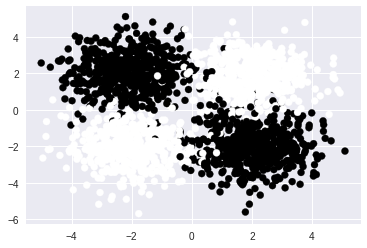

In [0]:
fig1 = plt.figure()
plt.scatter(samples['input'][:,0], samples['input'][:,1], \
            c=samples['output'][:])

In [0]:
# train-valid-test split #### valid_split, test_split
samples_train = samples[:int(nb_samples*(1-valid_split-test_split))] 
samples_valid = samples[int(nb_samples*(1-valid_split-test_split)):int(nb_samples*(1-test_split))]
samples_test  = samples[int(nb_samples*(1-test_split)):]

In [0]:
len(samples_train), len(samples_valid), len(samples_test)

(1400, 400, 200)

In [0]:
# standardizalas train alapjan train, valid es test-re
scaler = StandardScaler().fit(samples_train['input']) # mean es var kiszamolasa
samples_train['input'] = scaler.transform(samples_train['input'] ) # (argargarg-mean)/stdev
samples_valid['input'] = scaler.transform(samples_valid['input'])
samples_test['input'] = scaler.transform(samples_test['input'])


In [0]:
np.mean(samples_train['input']), np.std(samples_train['input'])

(-8.881784197001253e-18, 0.9999999999999996)

In [0]:
np.mean(samples_valid['input']), np.std(samples_valid['input'])

(0.009144005512672693, 0.9996639400191693)

In [0]:
np.mean(samples_test['input']), np.std(samples_test['input'])

(0.04808078850558832, 0.9633987034459949)

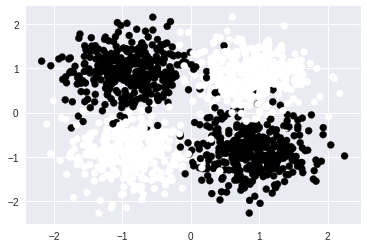

In [0]:
fig1 = plt.figure()
plt.scatter(samples_train['input'][:,0], samples_train['input'][:,1], \
            c=samples_train['output'][:])

In [0]:
class TrainingHistory(Callback):
  def on_train_begin(self, logs={}):
    self.losses=[]
    self.valid_losses =[]
    self.accs = []
    self.valid_accs = []
    self.epoch=0
    
  def on_epoch_end(self, epoch,logs={}):
    self.losses.append(logs.get('loss'))
    self.valid_losses.append(logs.get('val_loss'))
    self.accs.append(logs.get('acc'))
    self.valid_accs.append(logs.get('val_acc'))
    self.epoch += 1
    
history = TrainingHistory()

In [0]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(patience=10, verbose=1)

from keras.callbacks import ModelCheckpoint
mcp = ModelCheckpoint(filepath='weights.hdf5', verbose=1, save_best_only=True)

In [0]:
from keras import regularizers

In [0]:
# Neuralis halo felepites
model = Sequential()
model.add(Dense(100, input_shape=(2,), use_bias=True, kernel_regularizer=regularizers.l2(0.01)))
model.add(Activation('tanh'))
model.add(Dense(100, activation='relu'))
model.add(Dense(1, use_bias=False))
model.add(Activation('sigmoid'))



In [0]:
sgd=SGD(lr=0.1, momentum=0.001, nesterov=True)
model.compile(loss='mean_squared_error', optimizer=sgd)

hst = model.fit(samples_train['input'], samples_train['output'],\
         batch_size=8,
         epochs=2500000000,
         verbose=2,
         validation_data=(samples_valid['input'],samples_valid['output']),
         callbacks=[mcp, es, history],
         shuffle=True)

Train on 1400 samples, validate on 400 samples
Epoch 1/2500000000
 - 1s - loss: 0.1577 - val_loss: 0.1129

Epoch 00001: val_loss improved from inf to 0.11289, saving model to weights.hdf5
Epoch 2/2500000000
 - 0s - loss: 0.0935 - val_loss: 0.0907

Epoch 00002: val_loss improved from 0.11289 to 0.09067, saving model to weights.hdf5
Epoch 3/2500000000
 - 0s - loss: 0.0787 - val_loss: 0.0798

Epoch 00003: val_loss improved from 0.09067 to 0.07983, saving model to weights.hdf5
Epoch 4/2500000000
 - 0s - loss: 0.0702 - val_loss: 0.0755

Epoch 00004: val_loss improved from 0.07983 to 0.07549, saving model to weights.hdf5
Epoch 5/2500000000
 - 0s - loss: 0.0656 - val_loss: 0.0690

Epoch 00005: val_loss improved from 0.07549 to 0.06896, saving model to weights.hdf5
Epoch 6/2500000000
 - 0s - loss: 0.0618 - val_loss: 0.0673

Epoch 00006: val_loss improved from 0.06896 to 0.06727, saving model to weights.hdf5
Epoch 7/2500000000
 - 0s - loss: 0.0595 - val_loss: 0.0632

Epoch 00007: val_loss impro

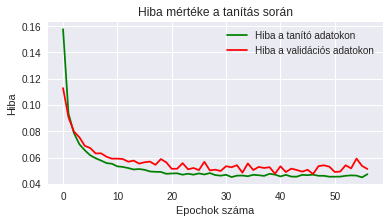

In [0]:
plt.figure(figsize=(6,3))
plt.title("Hiba mértéke a tanítás során")
plt.plot(np.arange(history.epoch), history.losses, color='g',  
         label="Hiba a tanító adatokon")
plt.plot(np.arange(history.epoch), history.valid_losses, color='r',
         label="Hiba a validációs adatokon")
plt.legend(loc='upper right')
plt.xlabel("Epochok száma")
plt.ylabel("Hiba")
plt.grid(True)
plt.show()

In [0]:
from keras.models import load_model

model = load_model('weights.hdf5')

In [0]:
preds = model.predict(samples_test['input'])
print(preds)

[[6.03022464e-02]
 [6.87112093e-01]
 [9.44710433e-01]
 [6.80471014e-04]
 [3.07876259e-01]
 [8.88767600e-01]
 [6.21710062e-01]
 [6.41853511e-01]
 [4.06359648e-03]
 [9.97128427e-01]
 [9.99970078e-01]
 [9.37198922e-02]
 [5.44115454e-02]
 [9.71723020e-01]
 [9.54721630e-01]
 [4.05986220e-01]
 [2.08027083e-02]
 [9.82923687e-01]
 [9.99066532e-01]
 [8.11812177e-04]
 [1.04892184e-03]
 [9.88560736e-01]
 [4.80925918e-01]
 [8.30126554e-03]
 [5.83225978e-04]
 [9.82253850e-01]
 [9.45405006e-01]
 [2.86955331e-02]
 [2.03147322e-01]
 [9.01822150e-01]
 [9.98735487e-01]
 [1.16830897e-02]
 [8.36583599e-03]
 [9.91737902e-01]
 [9.87826049e-01]
 [1.08181641e-01]
 [4.05559875e-02]
 [9.98834908e-01]
 [9.99512434e-01]
 [3.88251245e-02]
 [1.79712474e-01]
 [9.53522980e-01]
 [8.48789275e-01]
 [9.13523231e-03]
 [1.01369664e-01]
 [8.77181172e-01]
 [8.72519195e-01]
 [7.39491079e-03]
 [5.39407879e-03]
 [9.99569595e-01]
 [6.89767241e-01]
 [3.04230698e-03]
 [1.72124729e-01]
 [9.81670737e-01]
 [6.87482893e-01]
 [6.060991

In [0]:
from sklearn.metrics import mean_squared_error
test_mse = mean_squared_error(samples_test['output'], preds)
print("Teszt adatokon mért négyzetes hiba:",test_mse)

Teszt adatokon mért négyzetes hiba: 0.0424245498513852


In [0]:
print("Tehát átlagosan",np.sqrt(test_mse),"hibázik a hálónk a teszt adatokon")

Tehát átlagosan 0.20597220650220066 hibázik a hálónk a teszt adatokon


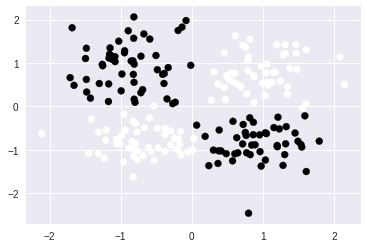

In [0]:
plt.figure()
plt.scatter(samples_test['input'][:,0], samples_test['input'][:,1],
            c=np.round(preds[:,0]))

# Modell vizsgálata

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 100)               300       
_________________________________________________________________
activation_23 (Activation)   (None, 100)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 100       
_________________________________________________________________
activation_24 (Activation)   (None, 1)                 0         
Total params: 10,500
Trainable params: 10,500
Non-trainable params: 0
_________________________________________________________________


In [0]:
print("Rétegek")
for layer in model.layers:
  print("Réteg neve:", layer.name,", tanítható: ", layer.trainable)
  print(layer.get_config())

Rétegek
Réteg neve: dense_25 , tanítható:  True
{'name': 'dense_25', 'trainable': True, 'batch_input_shape': (None, 2), 'dtype': 'float32', 'units': 100, 'activation': 'linear', 'use_bias': True, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'uniform', 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': {'class_name': 'L1L2', 'config': {'l1': 0.0, 'l2': 0.009999999776482582}}, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}
Réteg neve: activation_23 , tanítható:  True
{'name': 'activation_23', 'trainable': True, 'activation': 'tanh'}
Réteg neve: dense_26 , tanítható:  True
{'name': 'dense_26', 'trainable': True, 'units': 100, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'uniform', 'seed': None}}, 'bias_in

In [0]:
print("Súlyok:")
i=1
for layer in model.layers:
  print(model.get_layer(index=i).get_weights())
  i+=1

Súlyok:
[array([[-2.08816770e-02,  2.41970420e-02, -1.24087585e-02,
        -7.31600821e-02, -8.70172493e-03,  4.92812246e-02,
         9.26353559e-02, -1.08244948e-01,  3.68039422e-02,
        -7.19719455e-02, -1.16231211e-04,  6.88980967e-02,
         1.12526476e-01, -2.34928578e-02,  1.27534106e-01,
         8.70027095e-02,  2.57689469e-02,  5.44881150e-02,
         1.31624220e-02, -1.09253749e-01,  2.02249903e-02,
         6.10552840e-02,  7.82681555e-02, -4.44469675e-02,
        -9.77559388e-03,  7.66153336e-02, -3.62332724e-02,
         7.14586005e-02,  1.36486501e-01, -3.61443534e-02,
         4.62122560e-02, -6.25890940e-02, -9.61743668e-02,
        -1.72010083e-02, -2.72361953e-02, -3.31898555e-02,
         6.92422986e-02, -5.93644418e-02,  7.52034038e-03,
         6.88950270e-02, -3.42867188e-02, -1.79328490e-02,
        -4.16424163e-02, -1.42775197e-03,  4.71743159e-02,
         1.54177155e-02, -9.80873331e-02,  1.88307818e-02,
        -1.00534819e-02, -2.43515652e-02, -3.64

In [0]:
w_l1 = model.get_layer(index=1).get_weights()

In [0]:
seged = w_l1[0][0]
print(seged[np.abs(seged)<0.001])

[-1.5039858e-04 -8.9120935e-04 -4.2635715e-05  1.7171307e-04
 -4.6672462e-04  5.4875668e-04 -5.6825456e-04 -6.9135189e-04
 -8.0573640e-04 -4.0894374e-04  9.6048467e-04 -1.9902003e-04
 -8.3368574e-04 -1.7618411e-05 -2.4196098e-04  3.6199106e-04
  4.2698934e-04  7.6443946e-05  4.6410912e-04 -7.1210344e-04
 -2.0256813e-04 -3.9755326e-04 -2.8478331e-05  2.8189813e-04
 -6.7060150e-04 -4.0122872e-04  9.8311331e-04  6.3643325e-04
  8.3063479e-04  5.6191231e-04 -4.9614010e-04 -6.2014081e-04
 -7.6488184e-04  6.4124295e-04  2.8056814e-04  9.7071170e-04
  3.5424507e-04  5.2920112e-04  7.2862470e-04 -5.3327705e-04
 -3.5278674e-04 -2.1088216e-04  3.9573578e-04  9.1063802e-04
 -5.4644630e-04 -8.7551173e-04 -7.8518875e-04  2.6889145e-05
 -7.0601277e-04  7.4167008e-04  3.1319621e-04 -5.9458573e-04
 -2.1451968e-05 -4.7796813e-04 -7.8255020e-05  7.7784830e-04
 -5.1770662e-04 -7.4486015e-06 -7.0740841e-04 -9.0553612e-04
  4.1880668e-04  9.4705215e-04 -5.4581341e-04  4.6409399e-04
 -2.7960161e-04 -9.68062

# Boston Housing Prices 

In [0]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data

--2018-10-04 11:22:31--  https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.249
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.249|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 49082 (48K) [text/plain]
Saving to: ‘housing.data’

housing.data        100%[===================>]  47.93K  --.-KB/s    in 0.09s   

2018-10-04 11:22:31 (551 KB/s) - ‘housing.data’ saved [49082/49082]



In [0]:
!ls

housing.data  sample_data  weights.hdf5


In [0]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.callbacks import EarlyStopping, ModelCheckpoint
import copy
import pandas as pd
from keras.optimizers import SGD
from sklearn.preprocessing import StandardScaler
from tensorflow import set_random_seed
set_random_seed(123)
np.random.seed(123)

In [0]:
df = pd.read_csv("housing.data", delim_whitespace=True, header=None)
dataset=df.values

In [0]:
dataset.shape

(506, 14)

In [0]:
test_split = 0.1
valid_split = 0.1

X = dataset[:,:13]
Y = dataset[:,13]

v_index = int(X.shape[0]*(1-valid_split-test_split))
t_index = int(X.shape[0]*(1-test_split))

X_test = X[t_index:]
Y_test = Y[t_index:]
X_valid = X[v_index:t_index]
Y_valid = Y[v_index:t_index]
X_train = X[:v_index]
Y_train = Y[:v_index]

scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [0]:
es = EarlyStopping(patience = 30)
mcp = ModelCheckpoint(filepath='weights.hdf5', verbose=1, save_best_only=True)

model = Sequential()
model.add(Dense(60, input_shape=(X_train.shape[1],)))
model.add(Activation('sigmoid'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='linear'))

sgd = SGD(lr=1e-3, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='mse', optimizer=sgd)

history = model.fit(X_train, Y_train,
                   epochs=10000000,
                   batch_size=8,
                   verbose=2,
                   validation_data=(X_valid,Y_valid),
                   callbacks=[mcp,es])

Train on 404 samples, validate on 51 samples
Epoch 1/10000000
 - 1s - loss: 114.7415 - val_loss: 32.4773

Epoch 00001: val_loss improved from inf to 32.47727, saving model to weights.hdf5
Epoch 2/10000000
 - 0s - loss: 28.9525 - val_loss: 20.8096

Epoch 00002: val_loss improved from 32.47727 to 20.80961, saving model to weights.hdf5
Epoch 3/10000000
 - 0s - loss: 34.5627 - val_loss: 22.2777

Epoch 00003: val_loss did not improve from 20.80961
Epoch 4/10000000
 - 0s - loss: 24.7457 - val_loss: 51.0321

Epoch 00004: val_loss did not improve from 20.80961
Epoch 5/10000000
 - 0s - loss: 26.0502 - val_loss: 46.6167

Epoch 00005: val_loss did not improve from 20.80961
Epoch 6/10000000
 - 0s - loss: 26.4881 - val_loss: 24.4526

Epoch 00006: val_loss did not improve from 20.80961
Epoch 7/10000000
 - 0s - loss: 24.4235 - val_loss: 27.0068

Epoch 00007: val_loss did not improve from 20.80961
Epoch 8/10000000
 - 0s - loss: 21.7461 - val_loss: 40.3105

Epoch 00008: val_loss did not improve from 20

In [0]:
!pip install keras --upgrade

Requirement already up-to-date: keras in /usr/local/lib/python3.6/dist-packages (2.2.4)


In [0]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [0]:
from keras.models import load_model
model = load_model('weights.hdf5')

In [0]:
from sklearn.metrics import mean_squared_error
preds = model.predict(X_test)
err = mean_squared_error(Y_test,preds)

print("teszt adatokon mert hiba:",err)

teszt adatokon mert hiba: 13.68700675942565


In [0]:
np.sqrt(err)

3.6995954859181093

[(10, 30), (10, 30)]

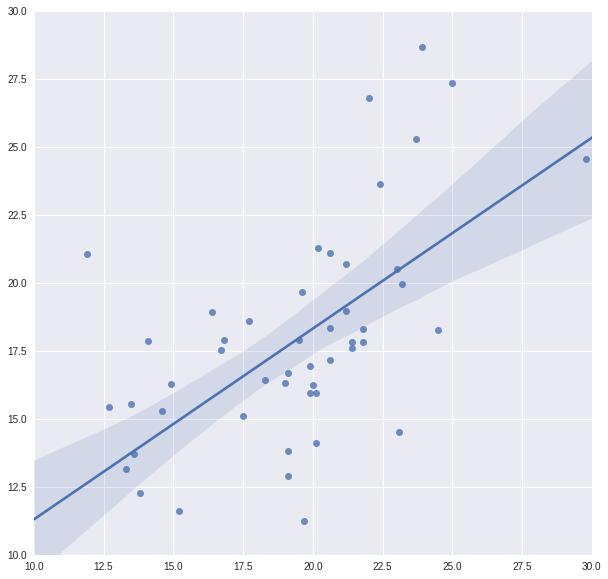

In [0]:
%matplotlib inline
import seaborn as sns # matplotlib, bokeh, ....
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))

sns.regplot(x=Y_test, y=preds.reshape(-1)).set(xlim=(10,30),ylim=(10,30))


In [0]:
preds_mean = [np.mean(Y_train) for i in range(Y_test.shape[0])]

In [0]:
print(preds_mean)

[24.175742574257427, 24.175742574257427, 24.175742574257427, 24.175742574257427, 24.175742574257427, 24.175742574257427, 24.175742574257427, 24.175742574257427, 24.175742574257427, 24.175742574257427, 24.175742574257427, 24.175742574257427, 24.175742574257427, 24.175742574257427, 24.175742574257427, 24.175742574257427, 24.175742574257427, 24.175742574257427, 24.175742574257427, 24.175742574257427, 24.175742574257427, 24.175742574257427, 24.175742574257427, 24.175742574257427, 24.175742574257427, 24.175742574257427, 24.175742574257427, 24.175742574257427, 24.175742574257427, 24.175742574257427, 24.175742574257427, 24.175742574257427, 24.175742574257427, 24.175742574257427, 24.175742574257427, 24.175742574257427, 24.175742574257427, 24.175742574257427, 24.175742574257427, 24.175742574257427, 24.175742574257427, 24.175742574257427, 24.175742574257427, 24.175742574257427, 24.175742574257427, 24.175742574257427, 24.175742574257427, 24.175742574257427, 24.175742574257427, 24.175742574257427,

In [0]:
preds_mean = np.array(preds_mean)

In [0]:
Y_test.shape

(51,)

In [0]:
from sklearn.metrics import mean_squared_error
err_mean = mean_squared_error(Y_test,preds_mean)

print("teszt adatokon mert hiba:",err_mean)

teszt adatokon mert hiba: 48.71029915848312


[(10, 30), (10, 30)]

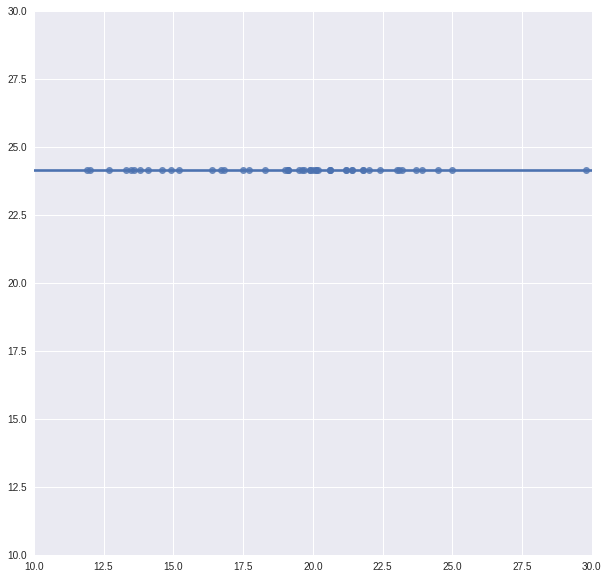

In [0]:
%matplotlib inline
import seaborn as sns # matplotlib, bokeh, ....
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))

sns.regplot(x=Y_test, y=preds_mean.reshape(-1)).set(xlim=(10,30),ylim=(10,30))
